In [145]:
#花弁の長さと花弁の幅
from sklearn import datasets
import numpy as np

#Irisデータセットをロード
iris=datasets.load_iris()

#3,4行目の特徴量を抽出
x=iris.data[:,[2,3]]

#クラスラベルを取得
y=iris.target

#一意なクラスラベルを3つ出力 
print('Class labels:',np.unique(y))  


#機械学習ライブラリではクラスラベルを整数として符号化する
#なぜならメモリ消費を抑えて計算性能を向上させるためだから

Class labels: [0 1 2]


In [140]:
#x配列とy配列を３割のテストデータと７割の訓練データにランダムに分割する
from sklearn.model_selection import train_test_split
#訓練データとテストデータに分割
#全体の３割をテストデータにする
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)
print('Labels counts in y:',np.bincount(y))
print('Labels counts in y_train:',np.bincount(y_train))
print('Labels counts in y_test:',np.bincount(y_test))


#train_test_split関数はデータセットを分割する前に訓練データセットを内部でシャッフルする
#じゃないとクラス０とクラス１のデータ点全てが訓練データセットに追加され，テストデータセットがクラス２の45個
#のデータ点で構成される．
#random_stateパラメータはデータセットを分割する前のシャッフルに使われる
#stratify=yは組み込み機能としてサポートされている層化サンプリングは訓練サブセット
#とテストサブセットに含まれているクラスラベルの比率が入力データセットと同じであること

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [141]:
from sklearn.preprocessing import StandardScaler  #StandardScalerクラスをpreprocessingモジュールから読み込む
sc=StandardScaler() #このクラスの新しいインスタンスを代入

#訓練データの平均と標準偏差を計算
sc.fit(x_train)   #訓練データから特徴量ごとに平均値と標準偏差を推定する

#平均と標準偏差を用いて標準化   
x_train_std=sc.transform(x_train)  #訓練データを標準化
x_test_std=sc.transform(x_test)    #テストデータセットを標準化


#ここでは一対他手法が用いられるため３つの品種のクラスをパーセプトロンに同時に与えることが可
#なお一対他とはone-vs-restと言って分類問題に使われる手法
#この手法はある特定のクラスに入るか，他のk-1個のクラスのどれかに入るかの2クラス分類問題を
#解く分類器をk個利用する

In [142]:
from sklearn.linear_model import Perceptron
#エポック数４０，学習りつ０．１でパーセプトロンのインスタンスを生成
ppn=Perceptron(eta0=0.1,random_state=1) #エポックごとに訓練データセットの並べ替えができるようにランダム

#訓練データをモデルに適合させる
ppn.fit(x_train_std,y_train)


#random_stateパラメータを使っているのはエポックごとに訓練データセットの並べ替えを再現できるようにするため


Perceptron(eta0=0.1, random_state=1)

In [99]:
#テストデータで予測を実地
y_pred=ppn.predict(x_test_std)
#誤分類のデータ点の個数を表示
print('Misclassified examples: %d' % (y_test!=y_pred).sum())

Misclassified examples: 1


In [143]:
from sklearn.metrics import accuracy_score
#分類の正解率を表示
print('Accuracy: %.3f' % accuracy_score(y_test,y_pred))
print('Accuracy: %.3f' % ppn.score(x_test_std,y_pred))


#y_testは真のクラスラベル，y_predは以前に予測したクラスラベル
#このメソッドではpredict呼び出しを先のaccuracy_scoreと組み合わせることで
#分類器の正解率を計算する


Accuracy: 0.978
Accuracy: 1.000


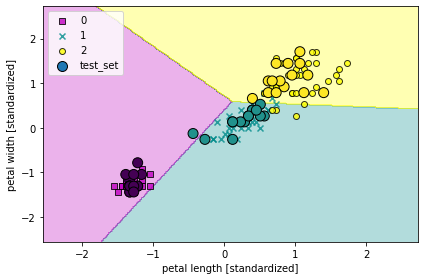

In [354]:
#正解率=1-誤分類率　
#過学習 モデルが訓練データのパターンを適切に認識するものの，未知のデータには汎用できない
#訓練したばかりのパーセプトロンモデルの決定領域をプロットし，様々な品種のデータ点をどの程度s機別できるのかしかする
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    #マーカーとカラーマップの準備
    markers=('s','x','o','^','v')
    colors=('m','darkcyan','yellow')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域のプロット
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,0].min()-1,X[:,0].max()+1
    
    #グリッドポイントの生成
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                       np.arange(x2_min,x2_max,resolution))
    
    #各特徴量を１次元配列に変換して予測を実行
    z=classifier.predict(np.array([xx1.ravel(),  xx2.ravel()]).T)
    
    #予測結果を元のグリッドポイントのデータサイズに変換
    Z=z.reshape(xx1.shape)
    
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.3, cmap=cmap)
    
    #軸の範囲の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにデータ点をプロット
    for idx,cl in enumerate(np.unique(y)):
        #print(X[y==cl,  0])
        #print(idx)
        plt.scatter(x=X[y==cl,  0],y=X[y==cl,1],alpha=0.8,c=colors[idx],
                   marker=markers[idx],label=cl,edgecolors='black')
        
    #テストデータ点を目立たせる(点をまるで表示)
    if test_idx:
        #for idx in y[test_idx]:
            #全てのデータ点をプロット
        x_test,y_test=X[test_idx,:],y[test_idx]
        #print(x_test)
        #for idx  in y_test:
            #print(idx)
            #print(y_test[:])
        plt.scatter(x_test[:,0], x_test[:,1],  c=y_test, edgecolors='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test_set')
              
#訓練データとテストデータの特徴量を行方向に結合
x_combined_std=np.vstack((x_train_std, x_test_std))

#訓練データとテストデータのクラスラベルを結合
y_combined=np.hstack((y_train, y_test))

#決定境界のプロット
plot_decision_regions(X=x_combined_std, y=y_combined, classifier=ppn,
                      test_idx=range(105,150))

#軸のラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

#凡例の設定(左上に配置)
plt.legend(loc='upper left')

#グラフを表示
plt.tight_layout()
plt.show()   

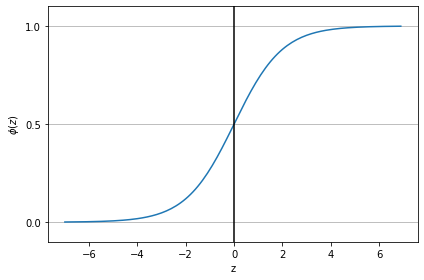

In [66]:
#ロジスティック回帰  線形分類問題と二値分類問題に対する単純なアルゴリズム
import matplotlib.pyplot as plt
import numpy as np

#シグモイド関数を定義
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

#0.1間隔で-7以上7未満のデータを生成
z=np.arange(-7,7,0.1)

#生成したデータでシグモイド関数を実行
phi_z=sigmoid(z)

#元のデータとシグモイド関数の出力をプロット
plt.plot(z,phi_z)

#垂直線を追加　z=0
plt.axvline(0.0, color='k')

#y軸の上限/加減を設定
plt.ylim(-0.1,1.1)

#軸のラベルを設定
plt.xlabel('z')
plt.ylabel('$\phi  (z)$')

#y軸のメモリを追加
plt.yticks([0.0, 0.5,  1.0])

#Axesクラスのオブジェクトの取得
ax=plt.gca()

#y軸のメモリに合わせて水平グリット線を追加
ax.yaxis.grid(True)

#グラフを表示
plt.tight_layout()
plt.show()


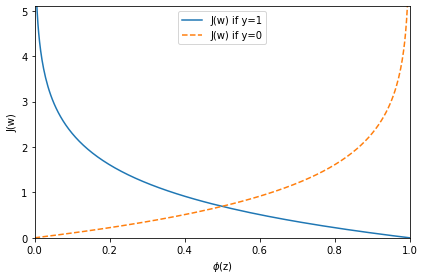

In [68]:
#y=1のコストを計算する関数
def cost_1(z):
    return - np.log(sigmoid(z))

#y=0のコストを計算する関数
def cost_0(z):
    return - np.log(1-sigmoid(z))

#0.1間隔で-10以上10未満のデータで生成
z=np.arange(-10, 10 ,0.1)

#シグモイド関数を実行
phi_z=sigmoid(z)

#y=1のコストを計算する関数を実行
c1=[cost_1(x) for x in z]

#結果をプロット
plt.plot(phi_z, c1, label='J(w) if y=1')

#y=0のコストを計算する関数を実行
c0=[cost_0(x) for x in z]

#結果をプロット
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

#x軸とy軸の上限/下限を設定
plt.ylim(0.0, 5.1)
plt.xlim([0,1])

#x軸のラベルを設定
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')

#凡例を設定
plt.legend(loc='upper center')

#グラフを表示
plt.tight_layout()
plt.show()

#シグモイド活性化関数を表現　y軸で関連するロジスティック回帰のコストを表現

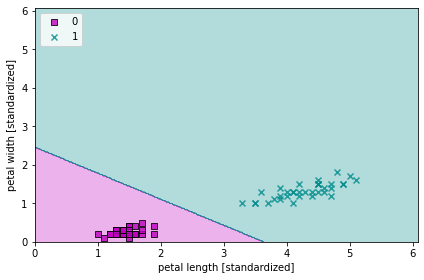

In [355]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)
#from matplotlib.colors import ListedColormap
#import matplotlib.pyplot as plt

class LogisticRegressionGD(object):
    """" 勾配降下法に基づくロジスティック回帰分類器
    
    パラメータ
    --------------------------
    eta: float
        学習りつ (0.0より大きく1.0以下の値)
    n_iter: int
        訓練データの訓練回数
    random_state  :  int
        重みを初期化するための乱数シード
        
    属性
    ---------------------------
    w_. :  １次元配列
        適合後の重み
    cost_: リスト
        各エポックでのロジスティックコスト関数
        
    """
    
    def __init__(self,  eta=0.05,  n_iter=100, random_state=1):
        #学習率の初期化，訓練回数の初期化，乱数シードを固定にするrandom_state
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    
    def fit(self,  X ,y):
        """" 訓練データに適合させる
        
        パラメータ
        -----------------------
        X : {配列のような構造}, shape=[n_examples, n_features]
            訓練データ
            n_examplesはデータ点の個数，n_featuresは特徴量の個数
        y: 配列のようなデータ構造，  shape=[n_examples]
            目的変数
            
        戻り値
        ---------
        self : object
        """
        
        rgen=np.random.RandomState(self.random_state)
        self.w_=rgen.normal(loc=0.0,  scale=0.01,  size=1 + X.shape[1])
        self.cost_=[]
        
        #訓練回数分まで訓練データを反復処理
        for i in range(self.n_iter):
            net_input=self.net_input(X)
            output=self.activation(net_input)
            errors=(y- output)
            self.w_[1:] +=self.eta * X.T.dot(errors)
            self.w_[0] +=self.eta * errors.sum()
            
            #誤差平方和のコストではなくロジスティック回帰のコストを計算することに注意
            cost=-y.dot(np.log(output)) - ((1-y).dot(np.log(1-output)))
            
            #エポックごとのコストを格納
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        """
        総入力を計算
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self,z):
        #ロジスティックシグモイド活性化関数を計算
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        #1ステップ後のクラスラベルを返す
        return np.where(self.net_input(X) >= 0.0,1,0)
    #以下に等しい
    #return np.where(self.activation(self.net_input(X)) >= 0.5, 1.0)
    
X_train_01_subset=X_train[(y_train == 0)  | (y_train==1)]
y_train_01_subset=y_train[(y_train == 0)  | (y_train==1)]

#ロジスティック回帰のインスタンスを生成
lrgd=LogisticRegressionGD(eta=0.05, n_iter=1000,  random_state=1)

#モデルを訓練データに適合させる
lrgd.fit(X_train_01_subset,  y_train_01_subset)

#決定領域をプロット
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset,classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

 列の合計